In [4]:
import os, gc
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
from inspect import getfile, getsource
from diffusers import (
    AutoencoderKL,
    DDPMScheduler,
    DiffusionPipeline,
    DPMSolverMultistepScheduler,
    DDIMScheduler,
    StableDiffusionPipeline,
    UNet2DConditionModel,
)


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

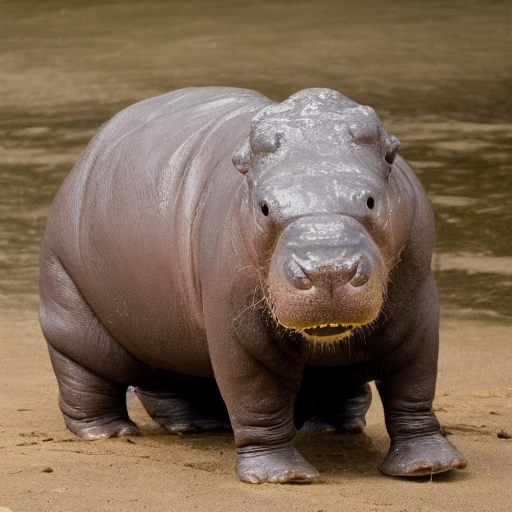

In [6]:

    
    
model_id = "data_root/logs/erased_moodeng/LoRA_fusion_model"
device = "cuda"

pipe = StableDiffusionPipeline.from_pretrained(model_id).to(device)
pipe.safety_checker = None
pipe.requires_safety_checker = False
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config) # deterministic

prompt = 'a photo of moodeng'
generator = torch.Generator(device).manual_seed(42)
image = pipe(prompt,generator=generator).images[0]  
display(image)


In [12]:
    
    
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

pipe = StableDiffusionPipeline.from_pretrained(model_id).to(device)
pipe.safety_checker = None
pipe.requires_safety_checker = False
torch.Generator(device=device).manual_seed(42)


pipe.unet

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): LoRACompatibleLinear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): LoRACompatibleLinear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): LoRACompatibleConv(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): LoRACompatibleLinear(in_features=320, out_features=320, bias=False)
                (to_k): LoRACompatibleLinear(in_features=320, out_features=320

In [ ]:
pipe.unet.fuse_lora()


print(getfile(pipe.unet.fuse_lora))         # Path to the file
print(getsource(pipe.unet.fuse_lora))       # Full source code of the class

/home/nessessence/anaconda3/envs/mace/lib/python3.10/site-packages/diffusers/loaders.py
    def fuse_lora(self, lora_scale=1.0, safe_fusing=False):
        self.lora_scale = lora_scale
        self._safe_fusing = safe_fusing
        self.apply(self._fuse_lora_apply)



: 

In [4]:

    
    
model_id = "saved_model/LoRA_fusion_model"
device = "cuda"

pipe = StableDiffusionPipeline.from_pretrained(model_id).to(device)
pipe.safety_checker = None
pipe.requires_safety_checker = False
torch.Generator(device=device).manual_seed(42)


pipe.unet

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): LoRACompatibleLinear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): LoRACompatibleLinear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): LoRACompatibleConv(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): LoRACompatibleLinear(in_features=320, out_features=320, bias=False)
                (to_k): LoRACompatibleLinear(in_features=320, out_features=320

In [12]:
print(pipe.unet.down_blocks[0].attentions[0].transformer_blocks[0].attn2)

Attention(
  (to_q): LoRACompatibleLinear(in_features=320, out_features=320, bias=False)
  (to_k): LoRACompatibleLinear(in_features=768, out_features=320, bias=False)
  (to_v): LoRACompatibleLinear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): LoRACompatibleLinear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
)


In [ ]:
print(pipe.unet.down_blocks[0].attentions[0].transformer_blocks[0].attn2)

layer = pipe.unet.down_blocks[0].attentions[0].transformer_blocks[0].attn2
print(layer)
print(layer.lora_layer)
# print(layer.LoRACompatibleLinear)

Attention(
  (to_q): LoRACompatibleLinear(in_features=320, out_features=320, bias=False)
  (to_k): LoRACompatibleLinear(in_features=768, out_features=320, bias=False)
  (to_v): LoRACompatibleLinear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): LoRACompatibleLinear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
)
LoRACompatibleLinear(in_features=320, out_features=320, bias=False)
None


In [23]:
from inspect import getfile, getsource

layer = pipe.unet.down_blocks[0].attentions[0].transformer_blocks[0].attn2.to_q
print(getfile(layer.__class__))         # Path to the file
print(getsource(layer.__class__))       # Full source code of the class

/home/nessessence/anaconda3/envs/mace/lib/python3.10/site-packages/diffusers/models/lora.py
class LoRACompatibleLinear(nn.Linear):
    """
    A Linear layer that can be used with LoRA.
    """

    def __init__(self, *args, lora_layer: Optional[LoRALinearLayer] = None, **kwargs):
        super().__init__(*args, **kwargs)
        self.lora_layer = lora_layer

    def set_lora_layer(self, lora_layer: Optional[LoRALinearLayer]):
        self.lora_layer = lora_layer

    def _fuse_lora(self, lora_scale: float = 1.0, safe_fusing: bool = False):
        if self.lora_layer is None:
            return

        dtype, device = self.weight.data.dtype, self.weight.data.device

        w_orig = self.weight.data.float()
        w_up = self.lora_layer.up.weight.data.float()
        w_down = self.lora_layer.down.weight.data.float()

        if self.lora_layer.network_alpha is not None:
            w_up = w_up * self.lora_layer.network_alpha / self.lora_layer.rank

        fused_weight = w_orig + (lo

In [6]:
    
    
model_id = "stabilityai/stable-diffusion-2-1"
device = "cuda"

pipe = StableDiffusionPipeline.from_pretrained(model_id).to(device)
pipe.safety_checker = None
pipe.requires_safety_checker = False
torch.Generator(device=device).manual_seed(42)


pipe.unet

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): LoRACompatibleLinear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): LoRACompatibleLinear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): LoRACompatibleLinear(in_features=320, out_features=320, bias=True)
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): LoRACompatibleLinear(in_features=320, out_features=320, bias=False)
                (to_k): LoRACompatibleLinear(in_features=320, out_features=